In [1]:
#Importing Libraries
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import tensorflow as tf

/Users/aashish/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


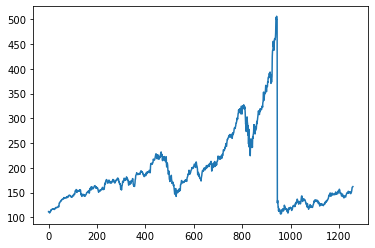

In [2]:
# Data collection
key="93423ac1ca41419cefafcf0e2687cf363146975e" 
df = pdr.get_data_tiingo('AAPL', api_key=key)
df.to_csv('AAPL.csv') 
df=pd.read_csv('AAPL.csv') 
df1=df.reset_index()['close']
plt.plot(df1)

In [3]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-11-28 00:00:00+00:00,111.57,112.465,111.39,111.430,27193983,26.251550,26.462137,26.209198,26.218609,108775932,0.0,1.0
1,AAPL,2016-11-29 00:00:00+00:00,111.46,112.030,110.07,110.780,28528750,26.225668,26.359785,25.898612,26.065670,114115000,0.0,1.0
2,AAPL,2016-11-30 00:00:00+00:00,110.52,112.200,110.27,111.560,36162258,26.004494,26.399784,25.945671,26.249197,144649032,0.0,1.0
3,AAPL,2016-12-01 00:00:00+00:00,109.49,110.940,109.03,110.365,37086862,25.762143,26.103316,25.653908,25.968023,148347448,0.0,1.0
4,AAPL,2016-12-02 00:00:00+00:00,109.90,110.090,108.85,109.170,26527997,25.858612,25.903318,25.611556,25.686849,106111988,0.0,1.0


In [4]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-11-18 00:00:00+00:00,157.87,158.67,153.0500,153.71,137827673,157.87,158.67,153.0500,153.71,137827673,0.0,1.0
1254,AAPL,2021-11-19 00:00:00+00:00,160.55,161.02,156.5328,157.65,117305597,160.55,161.02,156.5328,157.65,117305597,0.0,1.0
1255,AAPL,2021-11-22 00:00:00+00:00,161.02,165.70,161.0000,161.68,117467889,161.02,165.70,161.0000,161.68,117467889,0.0,1.0
1256,AAPL,2021-11-23 00:00:00+00:00,161.41,161.80,159.0601,161.12,96041899,161.41,161.80,159.0601,161.12,96041899,0.0,1.0
1257,AAPL,2021-11-24 00:00:00+00:00,161.94,162.14,159.6400,160.75,69463623,161.94,162.14,159.6400,160.75,69463623,0.0,1.0


In [5]:
# LSTM are sensitive to the scale of the data. so we apply MinMax scaler
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler(feature_range=(0,1)) 
df1=scaler.fit_transform(np.array(df1).reshape(-1,1)) 
print(df1)

[[0.01184721]
 [0.0115717 ]
 [0.00921728]
 ...
 [0.13570445]
 [0.13668128]
 [0.13800877]]


In [6]:
# splitting dataset into train and test split
training_size=int(len(df1)*0.65) 
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [7]:
# Print the training size and test size
training_size,test_size

(817, 441)

In [8]:
# Print the train data
train_data

array([[0.01184721],
       [0.0115717 ],
       [0.00921728],
       [0.00663745],
       [0.00766437],
       [0.00568566],
       [0.00778961],
       [0.01049468],
       [0.0132248 ],
       [0.01780839],
       [0.01618034],
       [0.02091421],
       [0.02091421],
       [0.02249217],
       [0.02286788],
       [0.02454602],
       [0.02532248],
       [0.025598  ],
       [0.02366938],
       [0.02424546],
       [0.02609894],
       [0.02484659],
       [0.02477145],
       [0.02249217],
       [0.02331872],
       [0.02299311],
       [0.02447088],
       [0.02772699],
       [0.03043206],
       [0.03073262],
       [0.03233563],
       [0.03108328],
       [0.03055729],
       [0.0329618 ],
       [0.03293676],
       [0.03241077],
       [0.0329618 ],
       [0.03316218],
       [0.03288666],
       [0.03767063],
       [0.03782091],
       [0.03784596],
       [0.03704446],
       [0.03634314],
       [0.0548779 ],
       [0.05432686],
       [0.05570445],
       [0.058

In [9]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1): 
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0] ###i=0, 0,1,2,3-----99 100 
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [10]:
# Reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape) 
print(X_test.shape), print(ytest.shape)

(716, 100)
(716,)
(340, 100)
(340,)


(None, None)

In [11]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1) 
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [13]:
# Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential() 
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) 
model.add(LSTM(50,return_sequences=True)) 
model.add(LSTM(50))
model.add(Dense(1)) 
model.compile(loss='mean_squared_error',optimizer='adam')
# Print the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
 # Setting the parameter for processing
 model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=64,verbose=1)

2021-11-26 02:29:23.877252: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-26 02:29:23.877803: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/200


2021-11-26 02:29:24.746017: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-26 02:29:24.879548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-26 02:29:25.026330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-26 02:29:25.170074: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-26 02:29:25.341298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-26 02:29:25.620304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-26 02:29:25.880303: I tensorflow/core/grappler/optimizers/cust

12/12 [==============================] - ETA: 0s - loss: 0.0357

2021-11-26 02:29:28.168663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-26 02:29:28.213160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-26 02:29:28.341473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-26 02:29:28.477057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 5s 267ms/step - loss: 0.0357 - val_loss: 0.0313
Epoch 2/200
12/12 [==============================] - 1s 94ms/step - loss: 0.0085 - val_loss: 0.0288
Epoch 3/200
12/12 [==============================] - 1s 95ms/step - loss: 0.0071 - val_loss: 0.0443
Epoch 4/200
12/12 [==============================] - 1s 95ms/step - loss: 0.0124 - val_loss: 0.0796
Epoch 5/200
12/12 [==============================] - 1s 95ms/step - loss: 0.0127 - val_loss: 0.0495
Epoch 6/200
12/12 [==============================] - 1s 95ms/step - loss: 0.0121 - val_loss: 0.0624
Epoch 7/200
12/12 [==============================] - 1s 95ms/step - loss: 0.0118 - val_loss: 0.0516
Epoch 8/200
12/12 [==============================] - 1s 96ms/step - loss: 0.0140 - val_loss: 0.0476
Epoch 9/200
12/12 [==============================] - 1s 96ms/step - loss: 0.0155 - val_loss: 0.0632
Epoch 10/200
12/12 [==============================] - 1s 96ms/step - loss: 0.0138 - val_loss: 0.0610
Epoch 11/2

12/12 [==============================] - 1s 97ms/step - loss: 0.0077 - val_loss: 0.0811
Epoch 83/200
12/12 [==============================] - 1s 97ms/step - loss: 0.0083 - val_loss: 0.0891
Epoch 84/200
12/12 [==============================] - 1s 98ms/step - loss: 0.0082 - val_loss: 0.0872
Epoch 85/200
12/12 [==============================] - 1s 103ms/step - loss: 0.0078 - val_loss: 0.0795
Epoch 86/200
12/12 [==============================] - 1s 97ms/step - loss: 0.0078 - val_loss: 0.0861
Epoch 87/200
12/12 [==============================] - 1s 98ms/step - loss: 0.0077 - val_loss: 0.0820
Epoch 88/200
12/12 [==============================] - 1s 94ms/step - loss: 0.0077 - val_loss: 0.0867
Epoch 89/200
12/12 [==============================] - 1s 103ms/step - loss: 0.0076 - val_loss: 0.0860
Epoch 90/200
12/12 [==============================] - 1s 110ms/step - loss: 0.0078 - val_loss: 0.0860
Epoch 91/200
12/12 [==============================] - 1s 111ms/step - loss: 0.0076 - val_loss: 0.0833

In [14]:
# Doing the prediction and check performance metrics
train_predict=model.predict(X_train) 
test_predict=model.predict(X_test)

2021-11-26 02:27:49.729149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-26 02:27:49.793099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-26 02:27:49.930808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-26 02:27:50.084147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [15]:
# Transformback to original form
train_predict=scaler.inverse_transform(train_predict) 
test_predict=scaler.inverse_transform(test_predict)

In [16]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error 
math.sqrt(mean_squared_error(y_train,train_predict))

195.03574904884886

In [17]:

math.sqrt(mean_squared_error(ytest,test_predict))

230.24177475641252

In [18]:
# Plotting
# shift train predictions for plotting 
look_back=100
trainPredictPlot = np.empty_like(df1) 
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

In [19]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan 
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

No handles with labels found to put in legend.


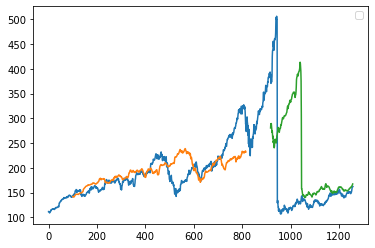

In [20]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1)) 
plt.plot(trainPredictPlot) 
plt.plot(testPredictPlot)
plt.legend()
plt.show()

In [21]:
# Print the number of test data
len(test_data) 
x_input=test_data[340:].reshape(1,-1) 
x_input.shape 
temp_input=list(x_input) 
temp_input=temp_input[0].tolist()

In [22]:
# demonstrate prediction for next 30 days
from numpy import array 
lst_output=[] 
n_steps=100
i=0
while(i<30):
  if(len(temp_input)>100): 
  #print(temp_input) 
    x_input=np.array(temp_input[1:]) 
    print("{} day input {}".format(i,x_input)) 
    x_input=x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1)) #print(x_input)
    yhat = model.predict(x_input, verbose=0) 
    print("{} day output {}".format(i,yhat)) 
    temp_input.extend(yhat[0].tolist()) 
    temp_input=temp_input[1:] 
    #print(temp_input) 
    lst_output.extend(yhat.tolist())
    i=i+1 
  else:
    x_input = x_input.reshape((1, n_steps,1)) 
    yhat = model.predict(x_input, verbose=0) 
    print(yhat[0]) 
    temp_input.extend(yhat[0].tolist()) 
    print(len(temp_input)) 
    lst_output.extend(yhat.tolist())
    i=i+1
  print(lst_output)
day_new=np.arange(1,101) 
day_pred=np.arange(101,131)

0 day input [0.09450219 0.09117095 0.09585473 0.09432686 0.09718222 0.1059737
 0.10429555 0.09906074 0.08919224 0.09845961 0.09658109 0.10008766
 0.10449593 0.10557295 0.10001252 0.09552912 0.09718222 0.09773325
 0.09688165 0.10149029 0.10046337 0.10073889 0.09843456 0.09830933
 0.09708203 0.09773325 0.10532248 0.10584847 0.11090795 0.10857858
 0.0989856  0.09983719 0.10356919 0.10737633 0.10715091 0.10399499
 0.10194114 0.10459612 0.11591735 0.11268629 0.11438948 0.11724483
 0.11887289 0.12485911 0.12090169 0.11829681 0.10552286 0.10697558
 0.10339386 0.10567314 0.10507201 0.09823419 0.09041954 0.09164684
 0.0977082  0.10016281 0.10038823 0.09650595 0.0878397  0.09014402
 0.08681277 0.08969317 0.08090169 0.08583594 0.08806512 0.09129618
 0.09031935 0.09009393 0.08683782 0.085335   0.09247339 0.09517846
 0.09946149 0.10499687 0.10624922 0.10680025 0.10482154 0.10469631
 0.1063995  0.10522229 0.11453976 0.10760175 0.10549781 0.10815279
 0.11183469 0.1105072  0.1113087  0.10920476 0.1101

10 day output [[1.3217149]]
[[1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754]]
11 day input [0.10008766 0.10449593 0.10557295 0.10001252 0.09552912 0.09718222
 0.09773325 0.09688165 0.10149029 0.10046337 0.10073889 0.09843456
 0.09830933 0.09708203 0.09773325 0.10532248 0.10584847 0.11090795
 0.10857858 0.0989856  0.09983719 0.10356919 0.10737633 0.10715091
 0.10399499 0.10194114 0.10459612 0.11591735 0.11268629 0.11438948
 0.11724483 0.11887289 0.12485911 0.12090169 0.11829681 0.10552286
 0.10697558 0.10339386 0.10567314 0.10507201 0.09823419 0.09041954
 0.09164684 0.0977082  0.10016281 0.10038823 0.09650595 0.0878397
 0.09014402 0.08681277 0.08969317 0.08090169 0.08583594 0.08806512
 0.09129618 0.09031935 0.09009393 0.08683782 0.085335   0.09247339
 0.09517846 0.09946149 0.10499687 0.10624922 0.

20 day output [[1.3217149]]
[[1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754]]
21 day input [0.10073889 0.09843456 0.09830933 0.09708203 0.09773325 0.10532248
 0.10584847 0.11090795 0.10857858 0.0989856  0.09983719 0.10356919
 0.10737633 0.10715091 0.10399499 0.10194114 0.10459612 0.11591735
 0.11268629 0.11438948 0.11724483 0.11887289 0.12485911 0.12090169
 0.11829681 0.10552286 0.10697558 0.10339386 0.10567314 0.10507201
 0.09823419 0.09041954 0.09164684 0.0977082  0.10016281 0.10038823
 0.09650595 0.0878397  0.09014402 0.08681277 0.08969317 0.08090169
 0.08583594 0.08806512 0.09

25 day output [[1.3217149]]
[[1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754], [1.3217148780822754]]
26 day input [0.10532248 0.10584847 0.11090795 0.10857858 0.0989856  0.09983719
 0.10356919 0.10737633 0.10715091 0.10399499 0.10194114 0.10459612
 0.11591735 0.11268629 0.11438948 0.11724483 0.11887289 0.12485911
 0.12090169 0.11829681 0.10552286 0.10697558 0.10339386 0.10567314
 0.10507201 0.09823419 0.09041954 0.09164684 0.0977082  0.10016281
 0.10038823 0.09650595 0.0878397  0.09014402 0.0868

ValueError: x and y must have same first dimension, but have shapes (100,) and (101, 1)

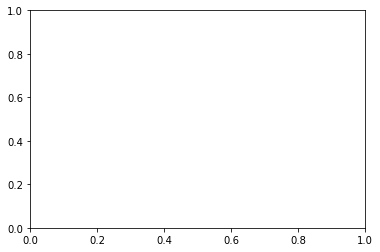

In [23]:
# Print the length of df1
len(df1)
df3= df1.tolist() 
df3.extend(lst_output)
# Print the graph
plt.plot(day_new,scaler.inverse_transform(df1[1157:])) 
plt.plot(day_pred,scaler.inverse_transform(lst_output))
# Print the summarized graph
df3=df1.tolist() 
df3.extend(lst_output) 
plt.plot(df3[1200:])